# 6. Atomic signatures counts and Venn diagram of alphabets

In this notebook we analyse the atomic signature repetitions accross databases and we compute a Venn diagram of alphabets.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from collections import Counter, defaultdict
from matplotlib_venn import venn3
from rdkit import Chem, RDLogger

from molsig.SignatureAlphabet import load_alphabet, merge_alphabets

# Suppress RDKit warnings
RDLogger.DisableLog('rdApp.*')

# Datasets path

In [2]:
path_datasets = "C:/Users/meyerp/Documents/INRAE/Datasets/"

# Atomic signature counts

In [3]:
def sig_morg_to_as(sig):
    return [x.split(" ## ")[1] for x in sig.split(" .. ")]

- metanetx

In [4]:
path_smiles = path_datasets + "metanetx/4_deduped.tsv"
df = pd.read_csv(path_smiles, sep='\t', usecols = ["SIGNATURE_MORGANS"])
list_sig_metanetx = list(df["SIGNATURE_MORGANS"])

path_smiles = path_datasets + "metanetx/test.tsv"
df = pd.read_csv(path_smiles, sep='\t', usecols = ["SIGNATURE_MORGANS"])
list_sig_metanetx = list_sig_metanetx + list(df["SIGNATURE_MORGANS"])

{1: 4021994, 2: 416677, 5: 2385, 3: 30003, 16: 138, 4: 19174, 12: 386, 22: 30, 18: 91, 10: 633, 6: 2962, 7: 938, 11: 361, 21: 43, 19: 89, 8: 1003, 15: 189, 17: 117, 20: 53, 9: 437, 13: 275, 24: 13, 14: 216, 23: 22, 25: 11, 27: 7, 26: 7, 29: 3, 28: 3}


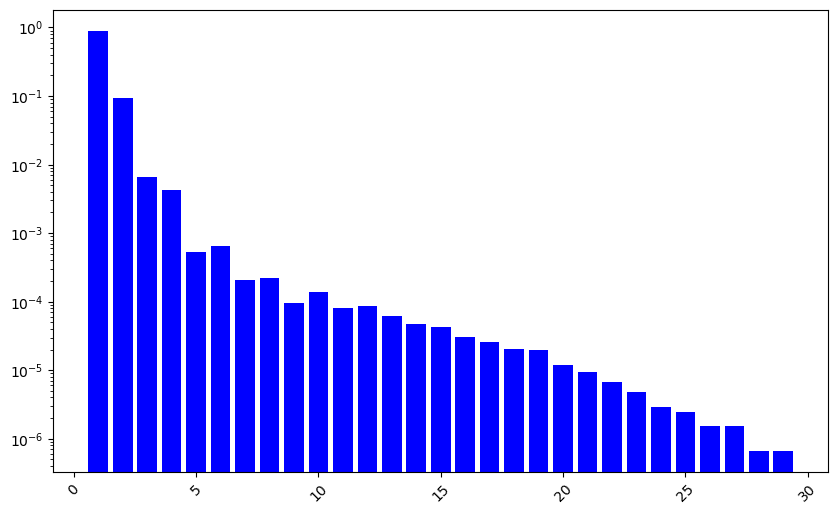

In [5]:
repartition_count_metanetx = defaultdict(int)

for sig in list_sig_metanetx:
    atomic_signatures = sig_morg_to_as(sig)
    count = Counter(atomic_signatures)
    repartition = list(count.values())
    for rep in repartition:
        repartition_count_metanetx[rep] += 1

repartition_count_metanetx = dict(repartition_count_metanetx)
print(repartition_count_metanetx)

total_sum = sum(repartition_count_metanetx.values())
repartition_count_metanetx_freq = density = {key: value / total_sum for key, value in repartition_count_metanetx.items()}

plt.figure(figsize=(10, 6))
plt.bar(repartition_count_metanetx_freq.keys(), repartition_count_metanetx_freq.values(), color='blue')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

- emolecules

In [6]:
path_smiles = path_datasets + "emolecules/2-sample_5000k.tsv"
df_chunks = pd.read_csv(path_smiles, sep='\t', usecols=["SIGNATURE_MORGANS"], chunksize=100000)

RangeIndex(start=0, stop=100000, step=1)
RangeIndex(start=100000, stop=200000, step=1)
RangeIndex(start=200000, stop=300000, step=1)
RangeIndex(start=300000, stop=400000, step=1)
RangeIndex(start=400000, stop=500000, step=1)
RangeIndex(start=500000, stop=600000, step=1)
RangeIndex(start=600000, stop=700000, step=1)
RangeIndex(start=700000, stop=800000, step=1)
RangeIndex(start=800000, stop=900000, step=1)
RangeIndex(start=900000, stop=1000000, step=1)
RangeIndex(start=1000000, stop=1100000, step=1)
RangeIndex(start=1100000, stop=1200000, step=1)
RangeIndex(start=1200000, stop=1300000, step=1)
RangeIndex(start=1300000, stop=1400000, step=1)
RangeIndex(start=1400000, stop=1500000, step=1)
RangeIndex(start=1500000, stop=1600000, step=1)
RangeIndex(start=1600000, stop=1700000, step=1)
RangeIndex(start=1700000, stop=1800000, step=1)
RangeIndex(start=1800000, stop=1900000, step=1)
RangeIndex(start=1900000, stop=2000000, step=1)
RangeIndex(start=2000000, stop=2100000, step=1)
RangeIndex(start

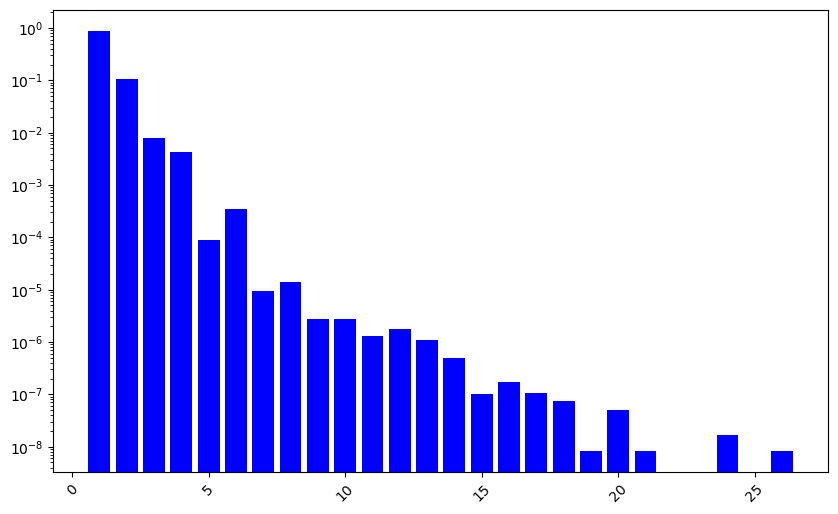

In [7]:
repartition_count_emolecules = defaultdict(int)

for chunk in df_chunks:
    print(chunk.index)

    list_sig_emolecules_chunk = list(chunk["SIGNATURE_MORGANS"])

    for sig in list_sig_emolecules_chunk:
        atomic_signatures = sig_morg_to_as(sig)
        count = Counter(atomic_signatures)
        repartition = list(count.values())
        for rep in repartition:
            repartition_count_emolecules[rep] += 1

path_smiles = path_datasets + "emolecules/test.tsv"
df = pd.read_csv(path_smiles, sep='\t', usecols = ["SIGNATURE_MORGANS"])
list_sig_emolecules = list(df["SIGNATURE_MORGANS"])
for sig in list_sig_emolecules:
    atomic_signatures = sig_morg_to_as(sig)
    count = Counter(atomic_signatures)
    repartition = list(count.values())
    for rep in repartition:
        repartition_count_emolecules[rep] += 1

repartition_count_emolecules = dict(repartition_count_emolecules)
print(repartition_count_emolecules)

total_sum = sum(repartition_count_emolecules.values())
repartition_count_emolecules_freq = density = {key: value / total_sum for key, value in repartition_count_emolecules.items()}
repartition_count_emolecules_freq

plt.figure(figsize=(10, 6))
plt.bar(repartition_count_emolecules_freq.keys(), repartition_count_emolecules_freq.values(), color='blue')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

- chembl

In [8]:
path_smiles = path_datasets + "chembl/chembl.tsv"
df_chunks = pd.read_csv(path_smiles, sep='\t', usecols=["SIGNATURE_MORGANS"], chunksize=100000)

RangeIndex(start=0, stop=100000, step=1)
RangeIndex(start=100000, stop=200000, step=1)
RangeIndex(start=200000, stop=300000, step=1)
RangeIndex(start=300000, stop=400000, step=1)
RangeIndex(start=400000, stop=500000, step=1)
RangeIndex(start=500000, stop=600000, step=1)
RangeIndex(start=600000, stop=700000, step=1)
RangeIndex(start=700000, stop=800000, step=1)
RangeIndex(start=800000, stop=900000, step=1)
RangeIndex(start=900000, stop=1000000, step=1)
RangeIndex(start=1000000, stop=1100000, step=1)
RangeIndex(start=1100000, stop=1200000, step=1)
RangeIndex(start=1200000, stop=1300000, step=1)
RangeIndex(start=1300000, stop=1400000, step=1)
RangeIndex(start=1400000, stop=1500000, step=1)
RangeIndex(start=1500000, stop=1600000, step=1)
RangeIndex(start=1600000, stop=1700000, step=1)
RangeIndex(start=1700000, stop=1800000, step=1)
RangeIndex(start=1800000, stop=1900000, step=1)
RangeIndex(start=1900000, stop=1907613, step=1)
{1: 36149457, 2: 5124472, 3: 304027, 8: 2930, 4: 288765, 6: 3017

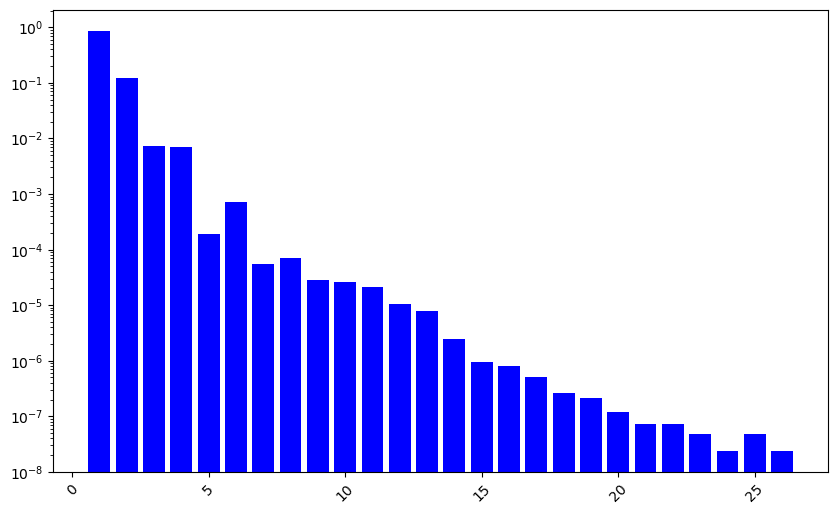

In [9]:
repartition_count_chembl = defaultdict(int)

for chunk in df_chunks:
    print(chunk.index)

    list_sig_chembl_chunk = list(chunk["SIGNATURE_MORGANS"])

    for sig in list_sig_chembl_chunk:
        atomic_signatures = sig_morg_to_as(sig)
        count = Counter(atomic_signatures)
        repartition = list(count.values())
        for rep in repartition:
            repartition_count_chembl[rep] += 1

repartition_count_chembl = dict(repartition_count_chembl)
print(repartition_count_chembl)

total_sum = sum(repartition_count_chembl.values())
repartition_count_chembl_freq = density = {key: value / total_sum for key, value in repartition_count_chembl.items()}
repartition_count_chembl_freq

plt.figure(figsize=(10, 6))
plt.bar(repartition_count_chembl_freq.keys(), repartition_count_chembl_freq.values(), color='blue')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

- all together

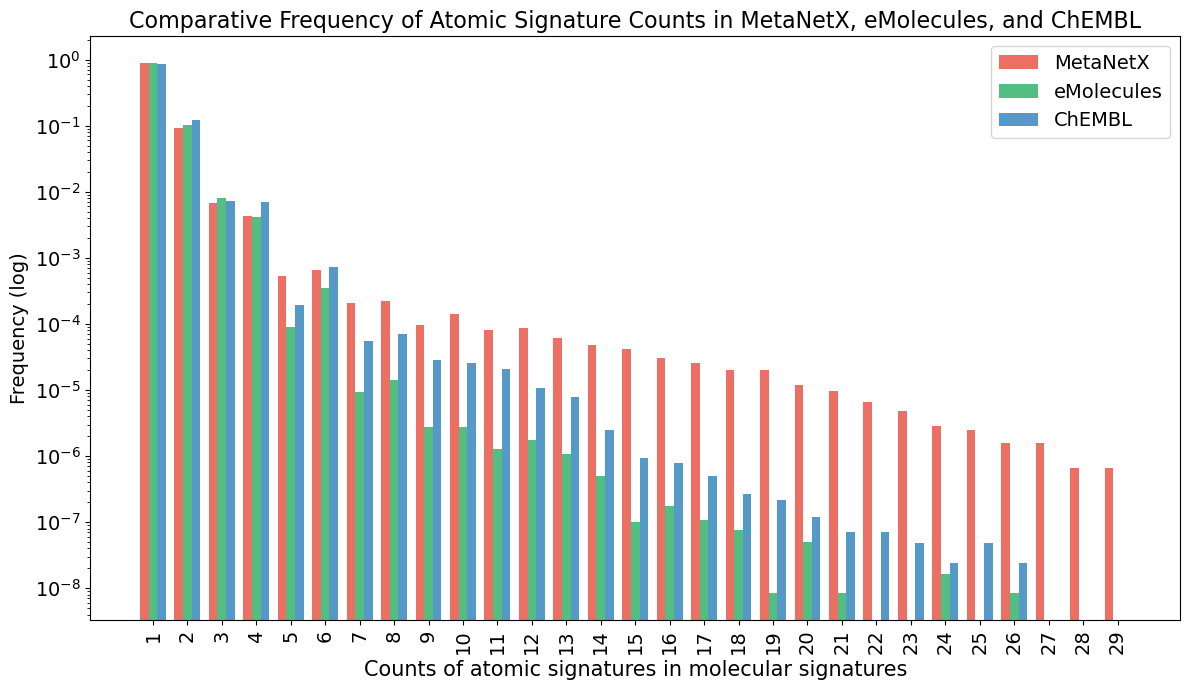

In [10]:
# Get the union of keys from all three dictionaries
all_keys = sorted(set(repartition_count_metanetx_freq.keys())
                  .union(repartition_count_emolecules_freq.keys())
                  .union(repartition_count_chembl_freq.keys()))

# Create lists for the values, using 0 for missing keys in each dictionary
metanetx_values = [repartition_count_metanetx_freq.get(key, 0) for key in all_keys]
emolecules_values = [repartition_count_emolecules_freq.get(key, 0) for key in all_keys]
chembl_values = [repartition_count_chembl_freq.get(key, 0) for key in all_keys]

# Set the positions of the bars
x_pos = np.arange(len(all_keys))
bar_width = 0.25

plt.figure(figsize=(12, 7))

# Set y-axis to logarithmic scale
plt.yscale('log')

# Plot the bars with spacing
plt.bar(x_pos - bar_width, metanetx_values, color="#E74C3C", alpha=0.8, width=bar_width, label='MetaNetX')
plt.bar(x_pos, emolecules_values, color='#27AE60', alpha=0.8, width=bar_width, label='eMolecules')
plt.bar(x_pos + bar_width, chembl_values, color='#2980B9', alpha=0.8, width=bar_width, label='ChEMBL')

# Add labels and legend with larger font sizes
plt.xticks(x_pos, all_keys, rotation=90, fontsize=14)
plt.xlabel('Counts of atomic signatures in molecular signatures', fontsize=15)
plt.ylabel('Frequency (log)', fontsize=14)
plt.legend(fontsize=14)

# Increase tick size
plt.tick_params(axis='y', labelsize=14)
plt.title("Comparative Frequency of Atomic Signature Counts in MetaNetX, eMolecules, and ChEMBL", fontsize=16)
plt.tight_layout()

plt.savefig("atom_sig_in_mol_sig_counts.png", dpi=300, bbox_inches='tight')  # For high-quality PNG
plt.show()

# Venn diagramm

In [11]:
Alphabet_metanetx = load_alphabet(path_datasets + "alphabets/metanetx_alphabet")
Alphabet_emolecules = load_alphabet(path_datasets + "alphabets/emolecules_alphabet")
Alphabet_chembl = load_alphabet(path_datasets + "alphabets/chembl_alphabet")

len(Alphabet_metanetx.Dict), len(Alphabet_emolecules.Dict), len(Alphabet_chembl.Dict)

(227717, 570421, 712244)

(106471, 292074, 6638, 404497, 36038, 193139, 78570)


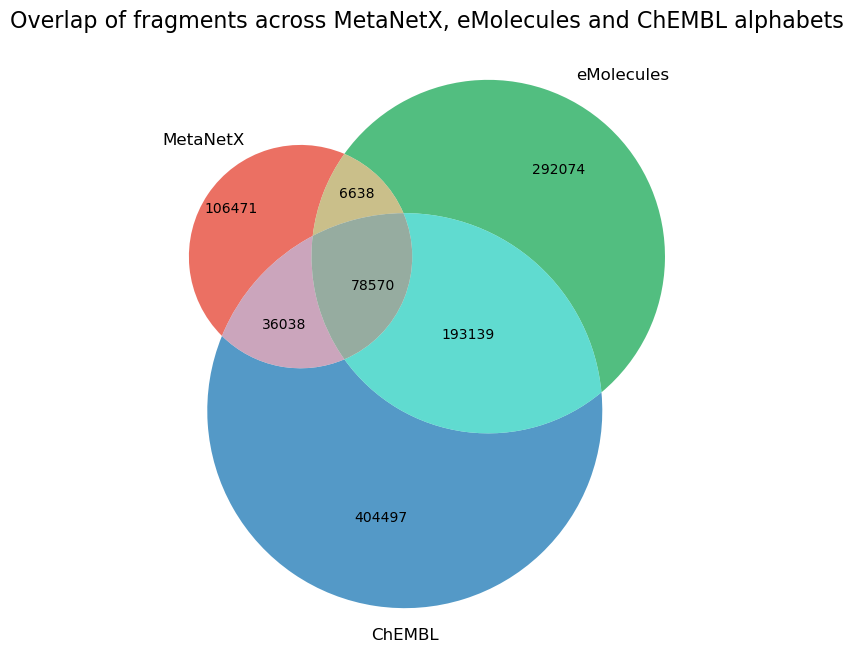

In [13]:
# Given total cardinalities
metanetx = len(Alphabet_metanetx.Dict)
emolecules = len(Alphabet_emolecules.Dict)
chembl = len(Alphabet_chembl.Dict)

# Pairwise intersections
mnx_emol = len((Alphabet_metanetx.Dict).intersection(Alphabet_emolecules.Dict))
mnx_chembl = len((Alphabet_metanetx.Dict).intersection(Alphabet_chembl.Dict))
emol_chembl = len((Alphabet_emolecules.Dict).intersection(Alphabet_chembl.Dict))

# Triple intersection
triple_intersection = len(((Alphabet_metanetx.Dict).intersection(Alphabet_emolecules.Dict)).intersection(Alphabet_chembl.Dict))

# Dataset labels
labels = ('MetaNetX', 'eMolecules', 'ChEMBL')

# Compute exclusive region sizes
only_mnx = metanetx - mnx_emol - mnx_chembl + triple_intersection
only_emol = emolecules - mnx_emol - emol_chembl + triple_intersection
only_chembl = chembl - mnx_chembl - emol_chembl + triple_intersection

mnx_emol_only = mnx_emol - triple_intersection
mnx_chembl_only = mnx_chembl - triple_intersection
emol_chembl_only = emol_chembl - triple_intersection

print((only_mnx, only_emol, mnx_emol_only, only_chembl, mnx_chembl_only, emol_chembl_only, triple_intersection))

# Prepare subsets in Venn3 format: A, B, A∩B, C, A∩C, B∩C, A∩B∩C
subsets = (only_mnx, only_emol, mnx_emol_only,
           only_chembl, mnx_chembl_only, emol_chembl_only,
           triple_intersection)

# Custom colors: MetaNetX = red, eMolecules = green, ChEMBL = blue
colors = ('#E74C3C', '#27AE60', '#2980B9')

# Plot the Venn diagram
plt.figure(figsize=(8, 8))
venn3(subsets=subsets, set_labels=labels, set_colors=colors, alpha=0.8)
plt.title("Overlap of fragments across MetaNetX, eMolecules and ChEMBL alphabets", fontsize=16)

plt.savefig("venn_diagram.png", dpi=300, bbox_inches='tight')  # For high-quality PNG
plt.show()